In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

detail data 
VendorID AcodeindicatingtheLPEPproviderthatprovided
 therecord.
 1=CreativeMobileTechnologies,LLC.
 2=VeriFoneInc.
 lpep_pickup_datetime Thedateandtimewhenthemeterwasengaged.
 lpep_dropoff_datetime Thedateandtimewhenthemeterwas
 disengaged.
 Passenger_count Thenumberofpassengersinthevehicle.
 Thisisadriver-enteredvalue.
 Trip_distance Theelapsedtripdistanceinmileswasreportedby
 thetaximeter.
 PULocationID TLCTaxiZoneinwhichthetaximeterwasengaged.
 DOLocationID TLCTaxiZoneinwhichthetaximeterwas
 disengaged.
 RateCodeID Thefinal ratecodeisineffectat theendof thetrip.
 1=Standardrate
 2=JFK
 3=Newark
 4=NassauorWestchester
 5=Negotiatedfare
 6=Groupride
 Store_and_fwd_flag Thisflagindicateswhetherthetriprecordwasheld
 inthevehiclememorybeforesendingtothevendor,
 aka“storeandforward,”becausethevehicledid
 nothaveaconnectiontotheserver.
 Y=storeandforwardtrip
 N=notastoreandforwardtrip
Payment_type Anumericcodesignifyinghowthepassengerpaid
 forthetrip.
 1=Creditcard
 2=Cash
 3=Nocharge
 4=Dispute
 5=Unknown
 6=Voidedtrip
 Fare_amount Thetime-and-distancefareiscalculatedbythe
 meter.ExtraMiscellaneousextrasandsurcharges.
 Currently, thisonlyincludesthe$0.50and$1rush
 hourandovernightcharges.
 MTA_tax $0.50MTAtaxthat isautomaticallytriggeredbased
 onthemeteredrateinuse.
 Improvement_surcharge $0.30improvementsurchargeassessedonhailed
 tripsat theflag
 drop.Theimprovementsurchargebeganbeing
 leviedin2015.
 Tip_amount Thisfieldisautomaticallypopulatedforcreditcard
 tips.Cashtipsarenot included.
 Tolls_amount Thetotalamountofall tollspaidinthetrip.
 Total_amount Thetotalamountchargedtopassengers.Doesnot
 includecashtips.
 Trip_type Acodeindicatingwhetherthetripwasastreethail
 oradispatchthat isautomaticallyassignedbased
 onthemeteredrateinusebutcanbealteredbythe
 driver.
 1=Street-hail
 2=Dispatch

In [2]:
df_raw= pd.read_csv('D:/PURWADHIKA/New York City Taxi and Limousine Trip Record/NYC TLC Trip Record.csv')
display(df_raw.head(),df_raw.tail())

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\3883687899.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw= pd.read_csv('D:/PURWADHIKA/New York City Taxi and Limousine Trip Record/NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [3]:
df = df_raw.copy()

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [5]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [7]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

* Improvement_surcharge $0.30 improvement surcharge assessed on hailed trips at the flag drop.The improvement surcharge began being levied in 2015 - Berdasarkan definisi dari data tersebut improvement surcharge seharusnya merupakan nilai positif
* congestion_surcharge : juga seharusnya tidak memiliki nilai minus karena
* MTA_tax: 0.5 tax that is automatically trigerred based on metered rate in use. berdasarkan definisi data ini seharusnya tidak ada ada data minus pada datanya kemungkinan terjadi kesalahan data pada pencatatan datanya

untuk extra, MTA tax

In [8]:
# melakukan pengencekan duplikat
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []


<Axes: >

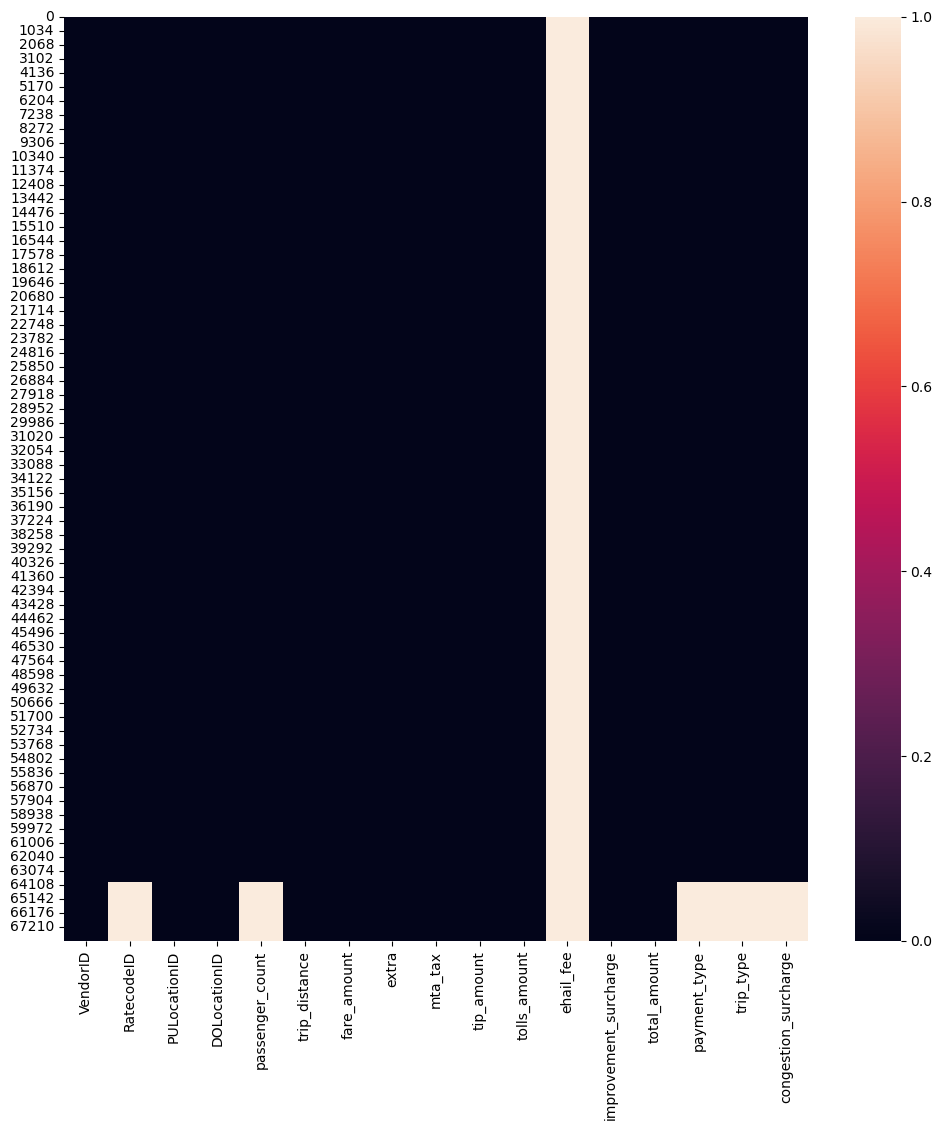

In [9]:
#melihat distribusi dari data kosong
plt.figure(figsize=(12,12))
sns.heatmap(df[['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge']].isna())

Strategi untuk handlemissing value dimana:store_and_fwd_flag =6,34%,, ratecode_ID:6,34%, passenger_count = 6.34% payment_type=6.339154


* asdada
trip_type                  6.353814
congestion_surcharge       6.339154

In [10]:
#karena ehail_fee 100% missing maka akan didrop ehail_fee                100.000000
df = df.drop(columns=['ehail_fee'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

In [11]:
#melakukan treatment pada data yang lain

In [12]:
df = df.dropna(subset=['fare_amount', 'trip_distance'])

In [13]:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       6.339154
RatecodeID               6.339154
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
congestion_surcharge     6.339154
dtype: float64

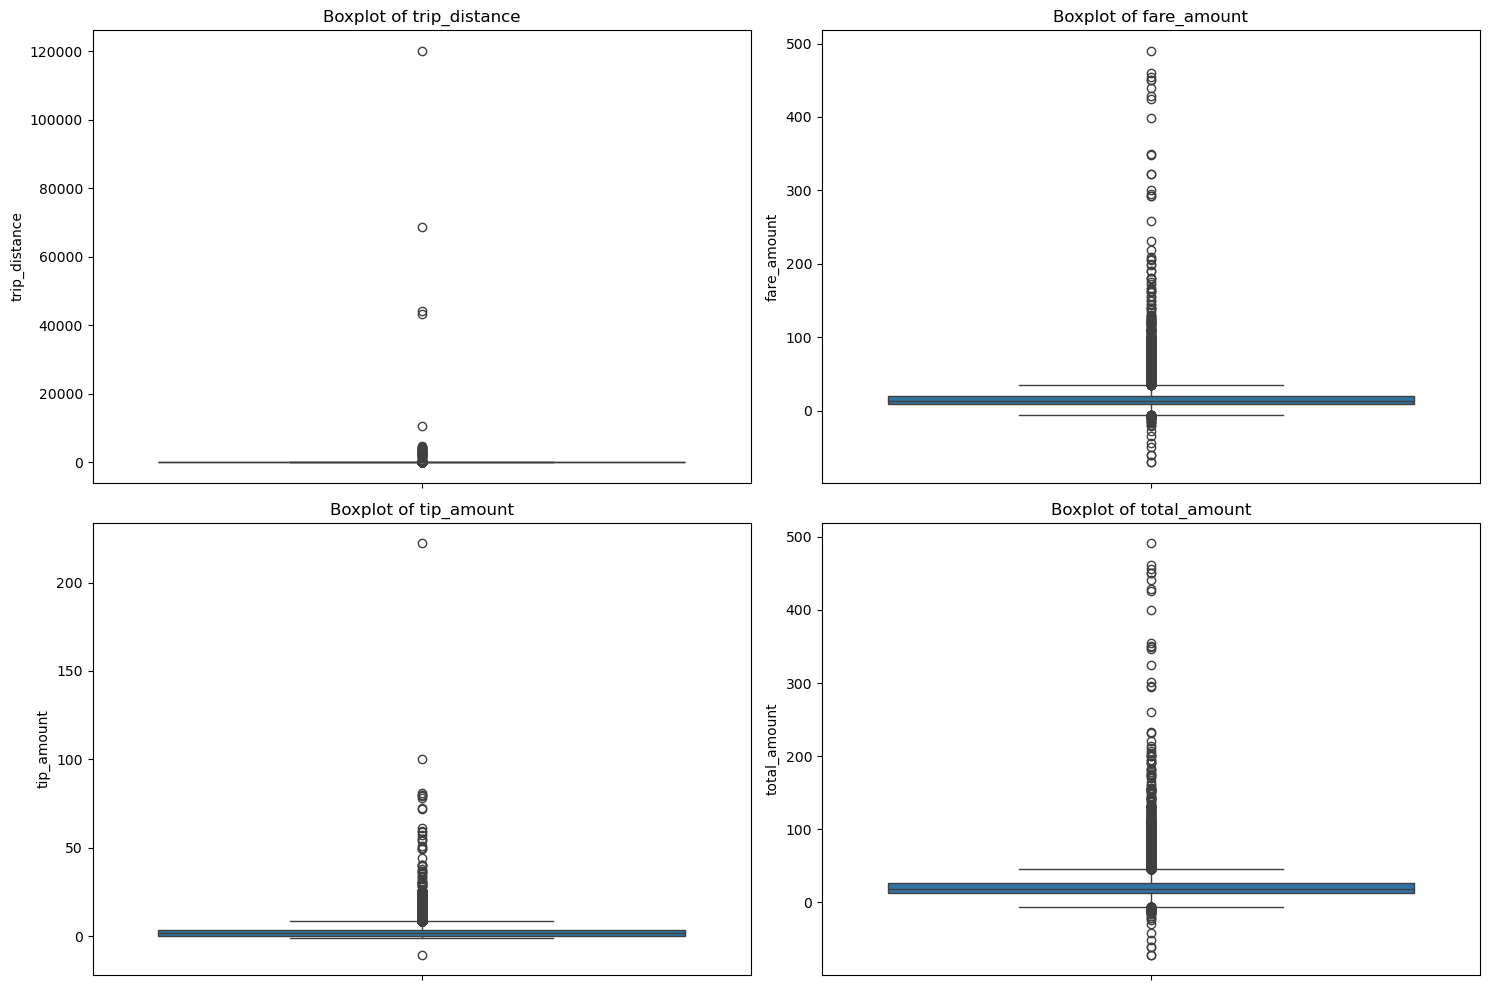

In [14]:

# melakukan pembuatan boxplot untuk mengetahui outliers, distribution
variables = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Set up figure size and plot layout
plt.figure(figsize=(15, 10))

# Loop through variables to create subplots
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Create 2x2 grid of plots
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In [15]:

df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])



In [16]:
# melakukan pemisahan pickup
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour         # Extract hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.dayofweek      # 0 = Monday, 6 = Sunday
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month        # Extract month
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator

In [17]:
print(df[['pickup_hour', 'pickup_day', 'pickup_month', 'is_weekend']].head())

   pickup_hour  pickup_day  pickup_month  is_weekend
0  0            6           1             1         
1  0            6           1             1         
2  0            6           1             1         
3  0            6           1             1         
4  0            6           1             1         


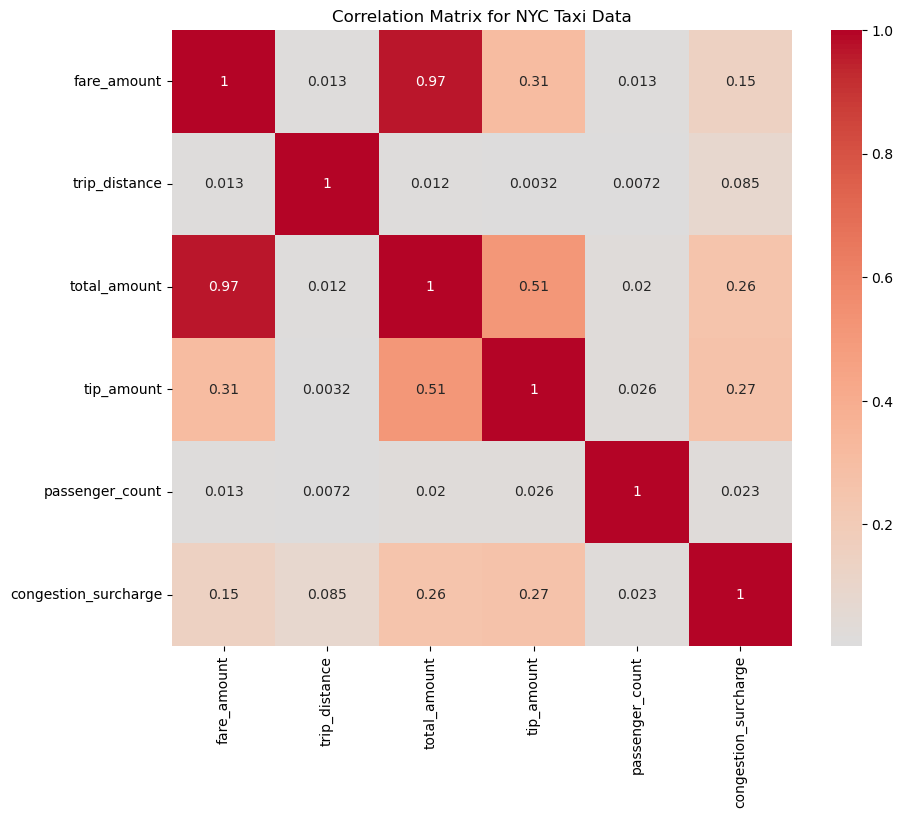

In [18]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['fare_amount', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count', 'congestion_surcharge']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for NYC Taxi Data')
plt.show()

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\2027013295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_hour', palette='Blues')


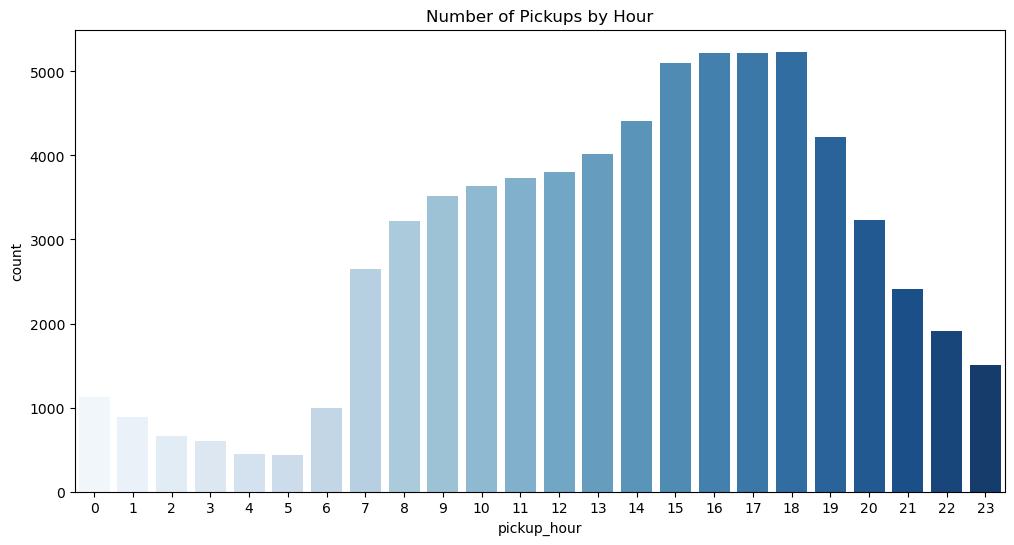

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\2027013295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_day', palette='Greens')


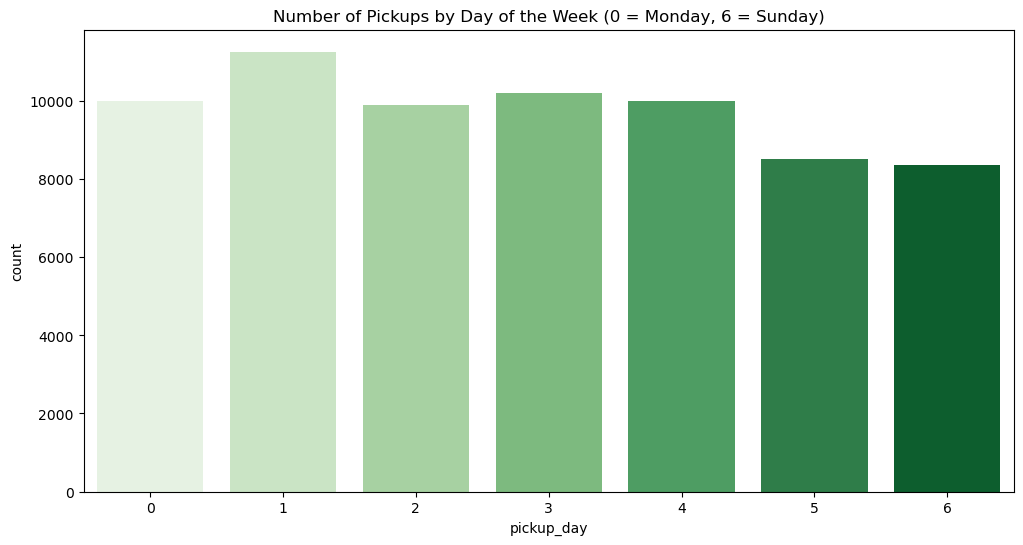

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\2027013295.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_month', palette='Purples')


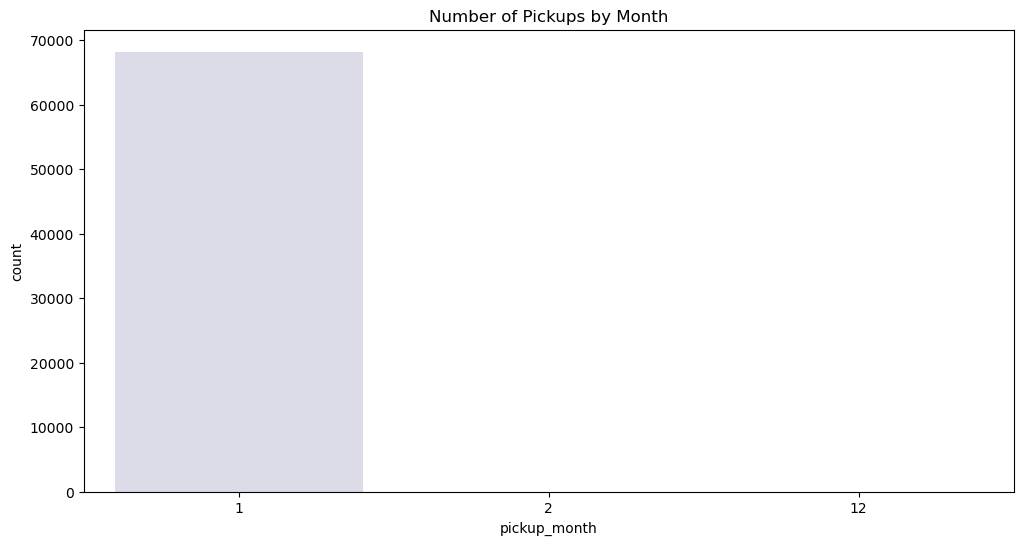

In [19]:
# Plot pickup hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_hour', palette='Blues')
plt.title('Number of Pickups by Hour')
plt.show()

# Plot pickup day distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_day', palette='Greens')
plt.title('Number of Pickups by Day of the Week (0 = Monday, 6 = Sunday)')
plt.show()

# Monthly pickup trend
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_month', palette='Purples')
plt.title('Number of Pickups by Month')
plt.show()

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\3186807580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Reds')


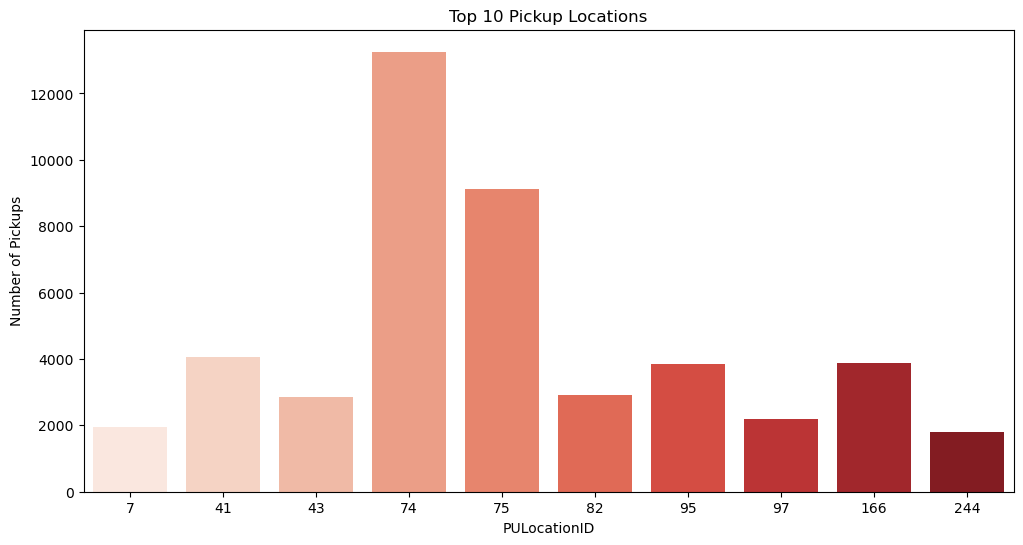

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_15784\3186807580.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoffs.index, y=top_dropoffs.values, palette='Blues')


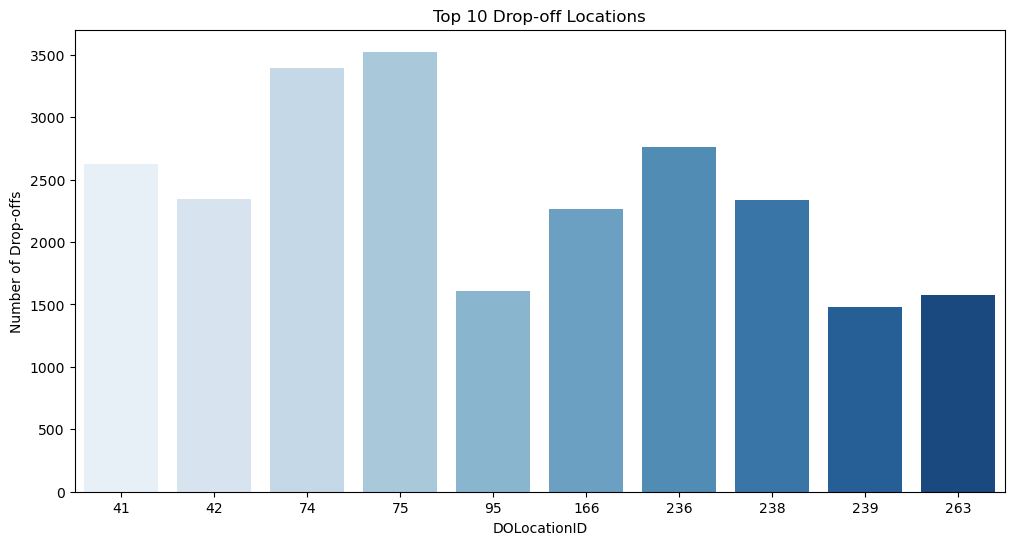

In [20]:
# Top 10 pickup locations
top_pickups = df['PULocationID'].value_counts().head(10)
top_dropoffs = df['DOLocationID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Reds')
plt.title('Top 10 Pickup Locations')
plt.xlabel('PULocationID')
plt.ylabel('Number of Pickups')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoffs.index, y=top_dropoffs.values, palette='Blues')
plt.title('Top 10 Drop-off Locations')
plt.xlabel('DOLocationID')
plt.ylabel('Number of Drop-offs')
plt.show()


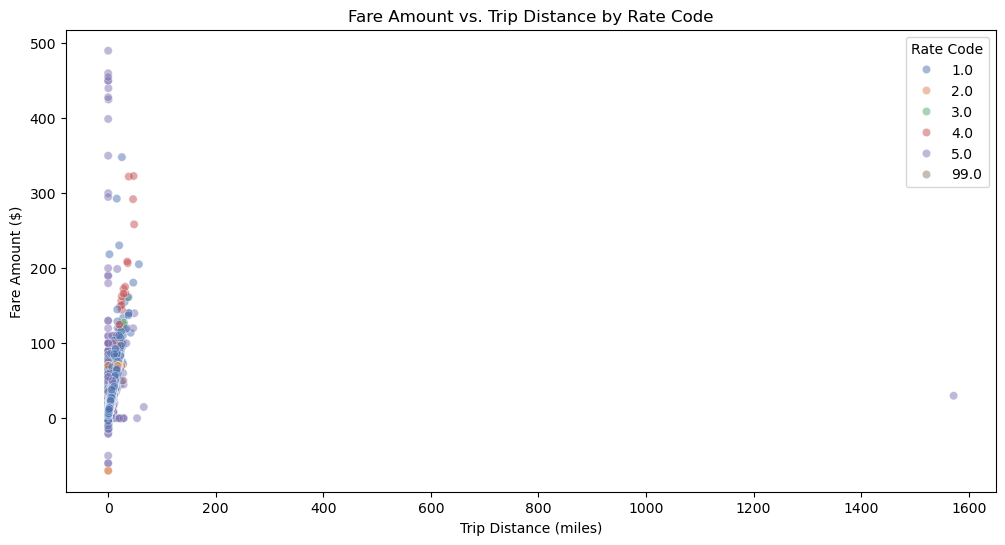

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='RatecodeID', palette='deep', alpha=0.5)
plt.title('Fare Amount vs. Trip Distance by Rate Code')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend(title='Rate Code')
plt.show()